In [1]:
!pip install etna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.3/304.3 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.0/354.0 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 83.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.1/172.1 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 68.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [2]:
import numpy as np
import pandas as pd
from etna.datasets import TSDataset

/usr/local/lib/python3.10/dist-packages/etna/settings.py:37: UserWarning: etna[torch] is not available, to install it, run `pip install etna[torch]`
  warnings.warn("etna[torch] is not available, to install it, run `pip install etna[torch]`")
/usr/local/lib/python3.10/dist-packages/etna/settings.py:45: UserWarning: wandb is not available, to install it, run `pip install etna[wandb]`
  warnings.warn("wandb is not available, to install it, run `pip install etna[wandb]`")
/usr/local/lib/python3.10/dist-packages/etna/settings.py:61: UserWarning: `tsfresh` is not available, to install it, run `pip install tsfresh==0.19.0 && pip install protobuf==3.20.1`
  warnings.warn(


In [52]:
df_flat = pd.read_csv("personal_transactions.csv")
filtered_data = df_flat[df_flat.iloc[:, 3] == "debit"]

# Удаление столбцов
columns_to_drop = [1, 3, 4, 5]
filtered_data = filtered_data.drop(filtered_data.columns[columns_to_drop], axis=1)

# Назначение имен столбцам
filtered_data.columns = ['timestamp', 'target']
filtered_data['timestamp'] = pd.to_datetime(filtered_data['timestamp'])

# Группировка данных по уникальным датам и суммирование чисел
grouped_data = filtered_data.groupby('timestamp')['target'].sum().reset_index()

# Результат
print(grouped_data)

     timestamp   target
0   2018-01-01    11.11
1   2018-01-02  1271.66
2   2018-01-04    11.76
3   2018-01-05    25.85
4   2018-01-06    18.45
..         ...      ...
404 2019-09-19    43.56
405 2019-09-22   131.10
406 2019-09-23    61.77
407 2019-09-28    37.73
408 2019-09-30    76.75

[409 rows x 2 columns]


In [5]:
print(grouped_data)
grouped_data = grouped_data.set_index('timestamp')
df_resampled = grouped_data.resample('D').fillna(method='ffill')
df_resampled = df_resampled.reset_index()

     timestamp   target
0   2018-01-01    11.11
1   2018-01-02  1271.66
2   2018-01-04    11.76
3   2018-01-05    25.85
4   2018-01-06    18.45
..         ...      ...
404 2019-09-19    43.56
405 2019-09-22   131.10
406 2019-09-23    61.77
407 2019-09-28    37.73
408 2019-09-30    76.75

[409 rows x 2 columns]


In [6]:
df_resampled["segment"] = "main"
# df_resampled['target'] = np.log(df_resampled['target'])
print(df_resampled)

     timestamp   target segment
0   2018-01-01    11.11    main
1   2018-01-02  1271.66    main
2   2018-01-03  1271.66    main
3   2018-01-04    11.76    main
4   2018-01-05    25.85    main
..         ...      ...     ...
633 2019-09-26    61.77    main
634 2019-09-27    61.77    main
635 2019-09-28    37.73    main
636 2019-09-29    37.73    main
637 2019-09-30    76.75    main

[638 rows x 3 columns]


In [7]:
# приводим данные к ETNA-формату
df = TSDataset.to_dataset(df_resampled)
ts = TSDataset(df=df, freq = 'D')
print(ts)

segment        main
feature      target
timestamp          
2018-01-01    11.11
2018-01-02  1271.66
2018-01-03  1271.66
2018-01-04    11.76
2018-01-05    25.85
...             ...
2019-09-26    61.77
2019-09-27    61.77
2019-09-28    37.73
2019-09-29    37.73
2019-09-30    76.75

[638 rows x 1 columns]


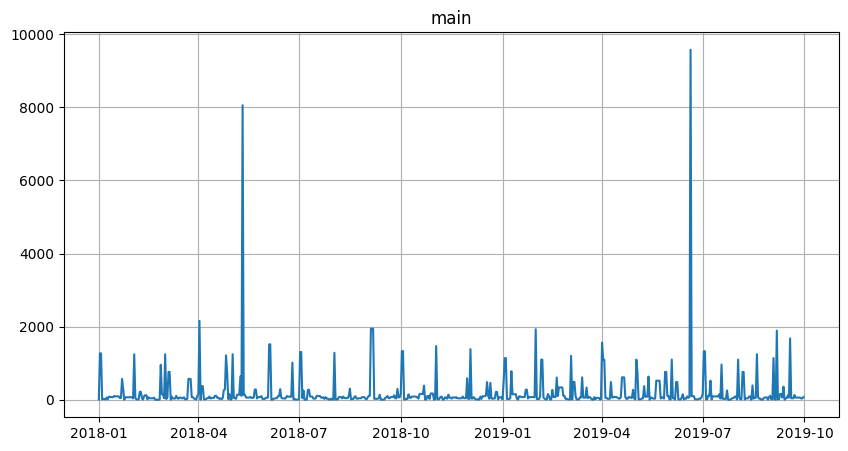

In [8]:
ts.plot()

(159, 2)
     timestamp   target
0   2018-01-01  518.408
1   2018-01-02   26.764
2   2018-01-03   65.786
3   2018-01-04   88.444
4   2018-01-05   77.084
..         ...      ...
154 2018-06-04  149.982
155 2018-06-05   56.484
156 2018-06-06  374.428
157 2018-06-07   71.994
158 2018-06-08   52.154

[159 rows x 2 columns]


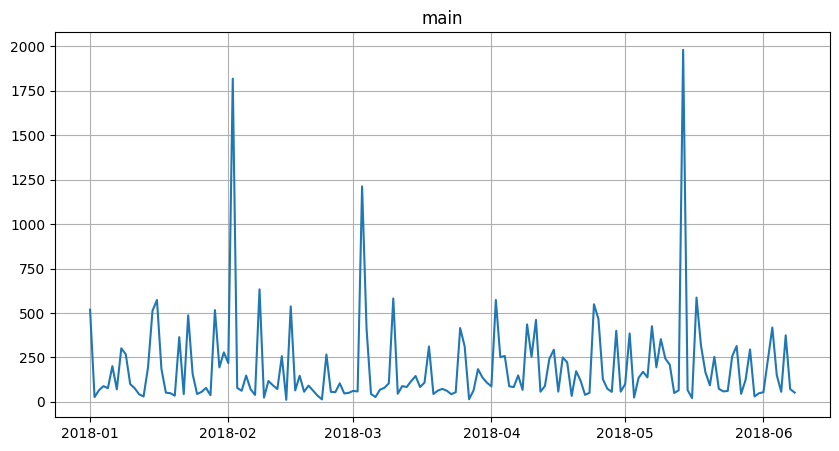

In [34]:
df = ts.to_pandas()
df = df.reset_index()
df.columns = ['timestamp', 'target']

dates = df['timestamp']



wnd_size = 5
df['target'] = df['target'].rolling(window=wnd_size).mean()
df = df[~np.isnan(df).any(axis=1)]
# df['target'] = np.log(df['target'])
# n_magnitude = 500
# df['target'] += np.sin(df.index / 10) * n_magnitude + n_magnitude

# Срез
n_each = 4
df = df.iloc[::n_each]
print(df.shape)

# Возвращение изначальных дат
date_true=df['timestamp']
df.index = range(df.shape[0])
df['timestamp'] = dates[:df.shape[0]]
df_tmp = df.copy()

print(df)

# приводим данные к ETNA-формату
df["segment"] = "main"
df = TSDataset.to_dataset(df)
ts2 = TSDataset(df=df, freq = 'D')
ts2.plot()


tmp = int(df_tmp.shape[0]/2)
train_ts, test_ts = ts2.train_test_split(
    train_start=df_tmp['timestamp'][0],
    train_end=df_tmp['timestamp'][tmp],
    test_start=df_tmp['timestamp'][tmp+1],
    test_end=df_tmp['timestamp'][df_tmp.shape[0]-1],
)

/usr/local/lib/python3.10/dist-packages/etna/models/utils.py:118: FutureWarning: warn is deprecated (and never implemented) and will be removed in a future version.
  freq = pd.infer_freq(timestamps, warn=False)
/usr/local/lib/python3.10/dist-packages/etna/datasets/tsdataset.py:277: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(


segment        main
feature      target
timestamp          
2018-01-01  518.408
2018-01-02   26.764
2018-01-03   65.786
2018-01-04   88.444
2018-01-05   77.084
...             ...
2018-03-17  108.124
2018-03-18  311.350
2018-03-19   44.148
2018-03-20   63.260
2018-03-21   72.970

[80 rows x 1 columns]
segment           main
feature         target
timestamp             
2018-03-22  284.756336
2018-03-23  -36.412184
2018-03-24  109.434145
2018-03-25   60.115215
2018-03-26   59.103721
...                ...
2018-06-04   62.858050
2018-06-05   26.196319
2018-06-06   43.656012
2018-06-07  471.192156
2018-06-08  180.995852

[79 rows x 1 columns]


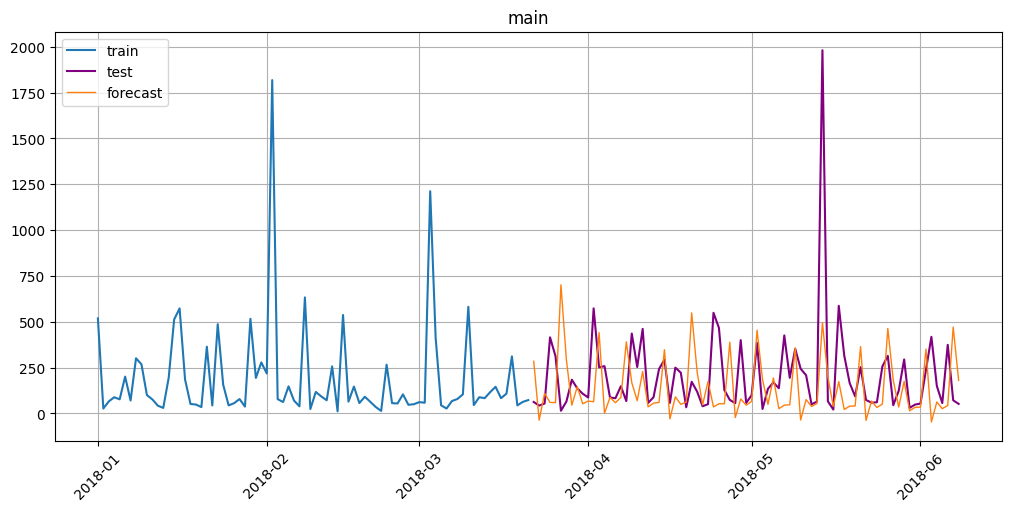

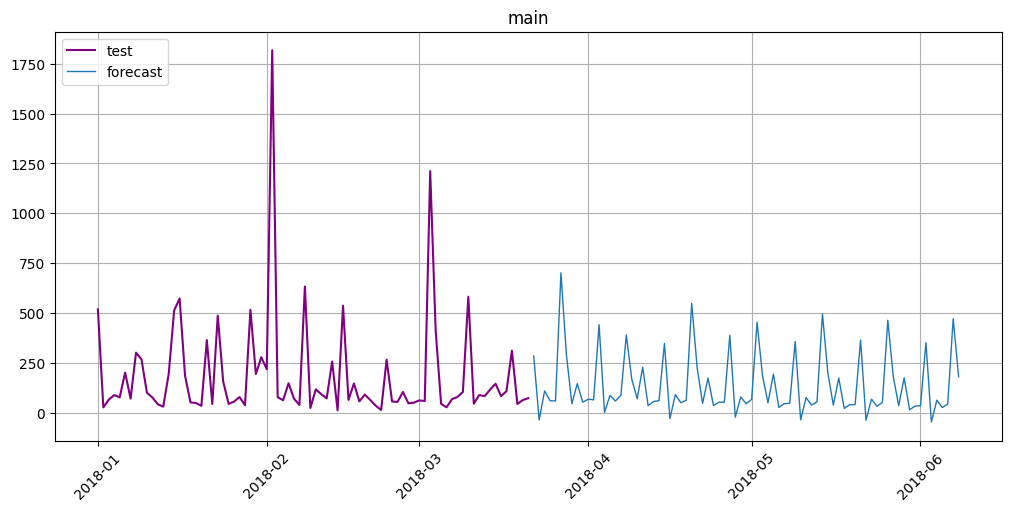

In [35]:
from etna.models import SARIMAXModel
from etna.analysis import plot_forecast

# Choose a horizon
HORIZON = 79

# Fit the model
model = SARIMAXModel(order = (10,0,0))
# model = ProphetModel()

model.fit(train_ts)

# Make the forecast
future_ts = train_ts.make_future(HORIZON)
forecast_ts = model.forecast(future_ts)

print(train_ts)
print(forecast_ts)

plot_forecast(forecast_ts, test_ts, train_ts,  n_train_samples=200)

plot_forecast(forecast_ts, train_ts,  n_train_samples=200)

In [36]:
from etna.metrics import RMSE

In [38]:
rmse = RMSE()
rmse(y_true=test_ts, y_pred=forecast_ts)

{'main': 271.1753870709024}

In [39]:
from etna.models import ProphetModel

In [40]:
print(train_ts)
model = ProphetModel(growth = 'linear', changepoints = None, n_changepoints = 100, changepoint_range = 1, yearly_seasonality = 'auto', weekly_seasonality = True, daily_seasonality = 'auto', holidays = None, seasonality_mode = 'additive', seasonality_prior_scale = 10.0, holidays_prior_scale = 10.0, changepoint_prior_scale = 0.05, mcmc_samples = 0, interval_width = 0.8, uncertainty_samples = 1000, stan_backend = None)
model.fit(train_ts)

segment        main
feature      target
timestamp          
2018-01-01  518.408
2018-01-02   26.764
2018-01-03   65.786
2018-01-04   88.444
2018-01-05   77.084
...             ...
2018-03-17  108.124
2018-03-18  311.350
2018-03-19   44.148
2018-03-20   63.260
2018-03-21   72.970

[80 rows x 1 columns]


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 79.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqxu92ax4/wonjz2_d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqxu92ax4/9ejvu09f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7469', 'data', 'file=/tmp/tmpqxu92ax4/wonjz2_d.json', 'init=/tmp/tmpqxu92ax4/9ejvu09f.json', 'output', 'file=/tmp/tmpqxu92ax4/prophet_model9l1vl26n/prophet_model-20230610183039.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:30:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:30:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

ProphetModel(growth = 'linear', changepoints = None, n_changepoints = 100, changepoint_range = 1, yearly_seasonality = 'auto', weekly_seasonality = True, daily_seasonality = 'auto', holidays = None, seasonality_mode = 'additive', seasonality_prior_scale = 10.0, holidays_prior_scale = 10.0, changepoint_prior_scale = 0.05, mcmc_samples = 0, interval_width = 0.8, uncertainty_samples = 1000, stan_backend = None, additional_seasonality_params = (), )

In [41]:
HORIZON = 79
future_ts = train_ts.make_future(HORIZON)
forecast_ts = model.forecast(future_ts)

/usr/local/lib/python3.10/dist-packages/etna/datasets/tsdataset.py:277: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(


segment           main
feature         target
timestamp             
2018-03-22  144.502302
2018-03-23  207.876983
2018-03-24  208.056934
2018-03-25  122.155045
2018-03-26  171.812464
...                ...
2018-06-04  118.181317
2018-06-05   91.075626
2018-06-06    9.125795
2018-06-07   85.508041
2018-06-08  148.882721

[79 rows x 1 columns]
segment        main
feature      target
timestamp          
2018-03-22   62.616
2018-03-23   43.050
2018-03-24   54.208
2018-03-25  415.112
2018-03-26  312.608
...             ...
2018-06-04  149.982
2018-06-05   56.484
2018-06-06  374.428
2018-06-07   71.994
2018-06-08   52.154

[79 rows x 1 columns]


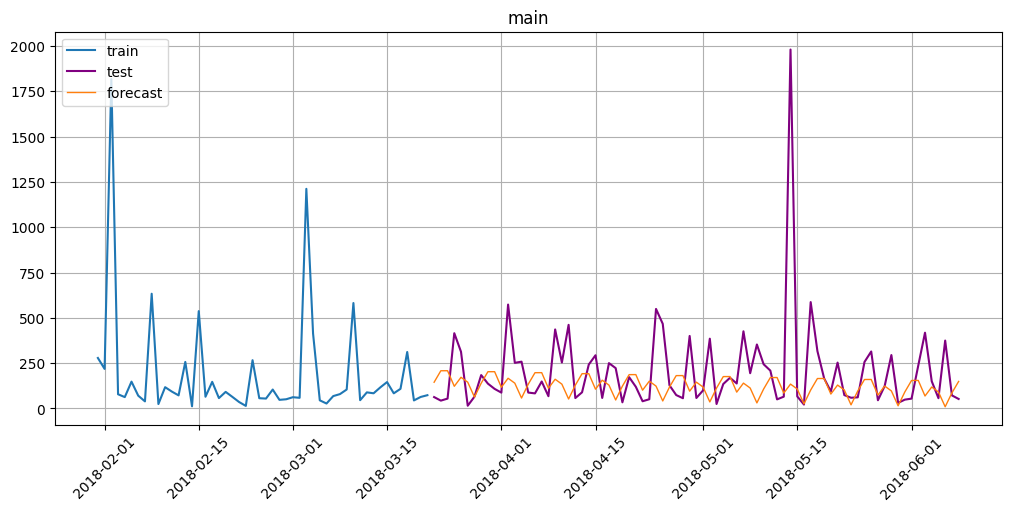

In [42]:
from etna.analysis import plot_forecast

print(forecast_ts)
print(test_ts)
plot_forecast(forecast_ts, test_ts, train_ts, n_train_samples=50)


In [43]:
from etna.metrics import RMSE
rmse = RMSE()
# test_ts2 = test_ts
# forecast_ts2 = forecast_ts[:20]
rmse(y_true=test_ts, y_pred=forecast_ts)

{'main': 269.1923065648591}

In [46]:
df = forecast_ts.to_pandas()
df.columns = ['target']
df['target'] = df['target'].astype(float)
df['target'] = np.exp(df['target'])
print(df)

                  target
timestamp               
2018-03-22  5.708900e+62
2018-03-23  1.904699e+90
2018-03-24  2.280228e+90
2018-03-25  1.125283e+53
2018-03-26  4.141951e+74
...                  ...
2018-06-04  2.115894e+51
2018-06-05  3.578013e+39
2018-06-06  9.189300e+03
2018-06-07  1.366691e+37
2018-06-08  4.559785e+64

[79 rows x 1 columns]


In [48]:
HORIZON = 200
from etna.models import NaiveModel

# Fit the model
model = NaiveModel(lag=20)
model.fit(train_ts)

# Make the forecast
future_ts = train_ts.make_future(future_steps=HORIZON, tail_steps=model.context_size)
forecast_ts = model.forecast(future_ts, prediction_size=HORIZON)

/usr/local/lib/python3.10/dist-packages/etna/datasets/tsdataset.py:277: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(


In [50]:
from etna.analysis import plot_forecast

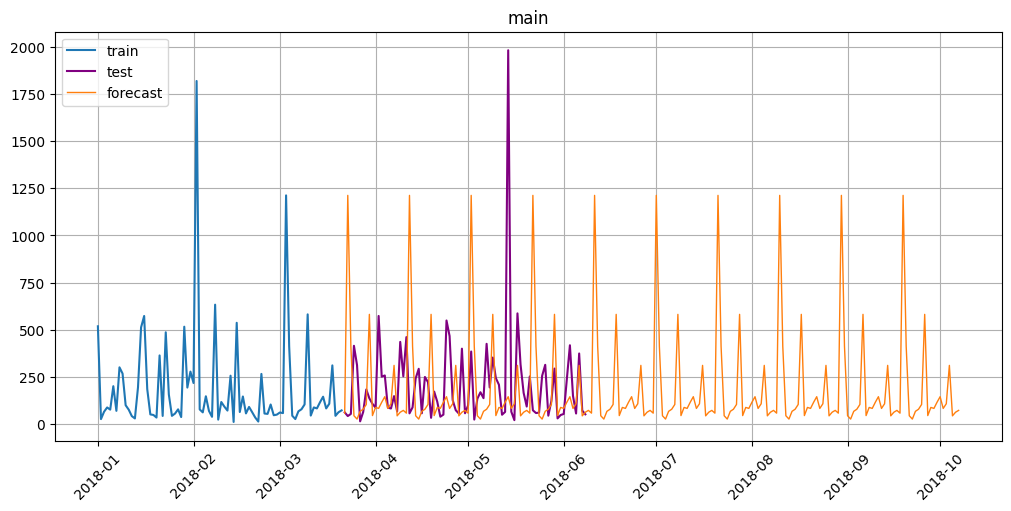

In [51]:
plot_forecast(forecast_ts, test_ts, train_ts, n_train_samples=100)